In [10]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline
import matplotlib.pyplot as plt

from operator import itemgetter  

from sklearn.metrics import plot_confusion_matrix

import os

# Evaluation

## Last-layer features

In [82]:
last_features_class1_path = "./output/went_icu_sel_proc2_last_layer.csv"
last_features_class2_path = "./output/not_went_icu_sel_proc2_last_layer.csv"

In [83]:
last_features_class1 = pd.read_csv(last_features_class1_path)
last_features_class1 = last_features_class1.iloc[:,1:].to_numpy()

print(last_features_class1.shape)

(35, 18)


In [84]:
last_features_class2 = pd.read_csv(last_features_class2_path)
last_features_class2 = last_features_class2.iloc[:,1:].to_numpy()

print(last_features_class2.shape)

(65, 18)


In [85]:
#concatenate
last_features = np.concatenate((last_features_class1, last_features_class2), axis=0)
print(last_features.shape)

#normalize
last_features_norm = (last_features - last_features.mean(axis=0)) / last_features.std(axis=0)  
print(last_features_norm.shape)

(100, 18)
(100, 18)


In [86]:
feature_name_file_path = './output/features_names.txt'

feature_names = []
with open(feature_name_file_path,'r') as f:
    for line in f:
        feature_names.append(str(line))
        
print(len(feature_names))
print(feature_names[0:5])

18
['Atelectasis\n', 'Cardiomegaly\n', 'Consolidation\n', 'Edema\n', 'Effusion\n']


In [87]:
Y = np.zeros((last_features.shape[0],))
Y[0:last_features_class1.shape[0],] = 1
Y.shape

(100,)

In [88]:
features = last_features_norm
features_names_ = feature_names

max_depth_tree = 3
min_samples_leaf = 10
clf = tree.DecisionTreeClassifier(class_weight={0:1,1:1},max_depth=max_depth_tree, min_samples_leaf=min_samples_leaf)

#class_weight={0:10,1:1}

in_training_loss = True
train_test_ratio = 0.2

if in_training_loss:
    clf = clf.fit(features, Y)
    y_pred = clf.predict(features)

    print(confusion_matrix(Y, y_pred))
    print(classification_report(Y, y_pred))

    feature_lst=[i for i in clf.tree_.feature if i != -2]

    print('features =', feature_lst)
    print('features name=', list(itemgetter(*feature_lst)(features_names_)))

else:
  X_train, X_test, y_train, y_test = \
  train_test_split(features, Y, test_size=train_test_ratio)

  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))



[[59  6]
 [14 21]]
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86        65
         1.0       0.78      0.60      0.68        35

    accuracy                           0.80       100
   macro avg       0.79      0.75      0.77       100
weighted avg       0.80      0.80      0.79       100

features = [4, 7, 15, 1]
features name= ['Effusion\n', 'Fibrosis\n', 'Pleural_Thickening\n', 'Cardiomegaly\n']


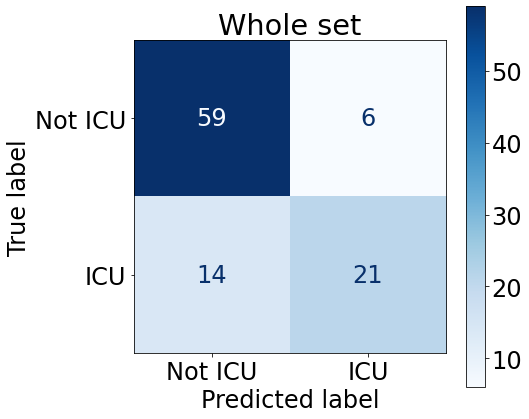

In [60]:
fig, ax = plt.subplots(figsize=(7,7))
plt.rcParams.update({'font.size': 24})

disp = plot_confusion_matrix(clf, features, Y,
                             display_labels=['Not ICU','ICU'],
                             cmap=plt.cm.Blues,
                             ax=ax)
disp.ax_.set_title('Whole set')

label_font = {'size':'24'}  # Adjust to fit
ax.set_xlabel('Predicted label', fontdict=label_font);
ax.set_ylabel('True label', fontdict=label_font);



[Text(558.0, 475.65000000000003, 'X[4] <= 0.714\ngini = 0.455\nsamples = 100.0%\nvalue = [0.65, 0.35]'),
 Text(279.0, 339.75, 'X[7] <= -0.679\ngini = 0.31\nsamples = 73.0%\nvalue = [0.808, 0.192]'),
 Text(139.5, 203.85000000000002, 'gini = 0.494\nsamples = 18.0%\nvalue = [0.556, 0.444]'),
 Text(418.5, 203.85000000000002, 'X[15] <= -0.265\ngini = 0.194\nsamples = 55.0%\nvalue = [0.891, 0.109]'),
 Text(279.0, 67.94999999999999, 'gini = 0.312\nsamples = 31.0%\nvalue = [0.806, 0.194]'),
 Text(558.0, 67.94999999999999, 'gini = 0.0\nsamples = 24.0%\nvalue = [1.0, 0.0]'),
 Text(837.0, 339.75, 'X[1] <= 0.341\ngini = 0.346\nsamples = 27.0%\nvalue = [0.222, 0.778]'),
 Text(697.5, 203.85000000000002, 'gini = 0.0\nsamples = 13.0%\nvalue = [0.0, 1.0]'),
 Text(976.5, 203.85000000000002, 'gini = 0.49\nsamples = 14.0%\nvalue = [0.429, 0.571]')]

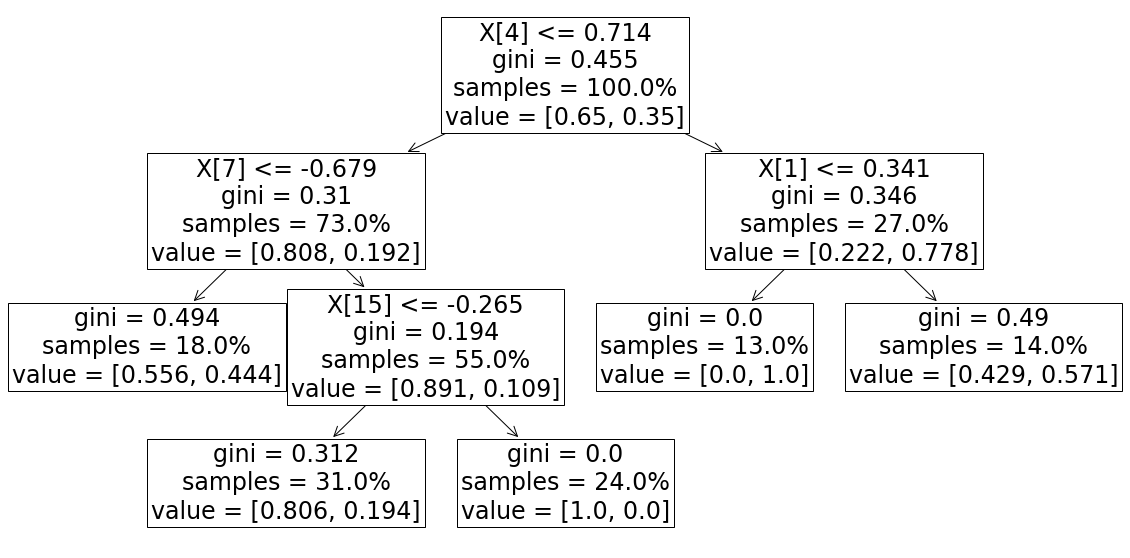

In [61]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, proportion=True) 

### Cross-val

In [62]:
# cross-validation

from sklearn.model_selection import cross_val_score, cross_val_predict

cv_scores = cross_val_predict(clf, features, Y, cv=35)

print(confusion_matrix(Y, cv_scores))
print(classification_report(Y, cv_scores))

[[58  7]
 [15 20]]
              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84        65
         1.0       0.74      0.57      0.65        35

    accuracy                           0.78       100
   macro avg       0.77      0.73      0.74       100
weighted avg       0.78      0.78      0.77       100



## Mid-layer features

In [63]:
mid_features_class1_path = "./output/went_icu_sel_proc2_mid_layer.csv"
mid_features_class2_path = "./output/not_went_icu_sel_proc2_mid_layer.csv"

In [64]:
mid_features_class1 = pd.read_csv(mid_features_class1_path)
mid_features_class1 = mid_features_class1.iloc[:,1:].to_numpy()

print(mid_features_class1.shape)

(35, 1024)


In [65]:
mid_features_class2 = pd.read_csv(mid_features_class2_path)
mid_features_class2 = mid_features_class2.iloc[:,1:].to_numpy()

print(mid_features_class2.shape)

(65, 1024)


In [66]:
# concatenate
mid_features = np.concatenate((mid_features_class1, mid_features_class2), axis=0)
print(mid_features.shape)

#normalize
mid_features_norm = (mid_features - mid_features.mean(axis=0)) / mid_features.std(axis=0)  
mid_features_norm[np.isnan(mid_features_norm)] = 0
print(mid_features_norm.shape)

(100, 1024)
(100, 1024)


/home/barth/anaconda3/envs/covid_test/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [67]:
features = mid_features_norm

max_depth_tree = 3
min_samples_leaf = 15
clf = tree.DecisionTreeClassifier(class_weight={0:1,1:1},max_depth=max_depth_tree, min_samples_leaf=min_samples_leaf)

in_training_loss = True
train_test_ratio = 0.2

if in_training_loss:
    clf = clf.fit(features, Y)
    y_pred = clf.predict(features)

    print(confusion_matrix(Y, y_pred))
    print(classification_report(Y, y_pred))

    feature_lst=[i for i in clf.tree_.feature if i != -2]
    print(len(feature_lst),'features')

else:
  X_train, X_test, y_train, y_test = \
  train_test_split(features, Y, test_size=train_test_ratio)

  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

[[58  7]
 [ 6 29]]
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90        65
         1.0       0.81      0.83      0.82        35

    accuracy                           0.87       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.87      0.87      0.87       100

3 features


[Text(446.4, 475.65000000000003, 'X[528] <= -0.715\ngini = 0.455\nsamples = 100.0%\nvalue = [0.65, 0.35]'),
 Text(223.2, 339.75, 'gini = 0.172\nsamples = 21.0%\nvalue = [0.095, 0.905]'),
 Text(669.5999999999999, 339.75, 'X[143] <= 0.563\ngini = 0.323\nsamples = 79.0%\nvalue = [0.797, 0.203]'),
 Text(446.4, 203.85000000000002, 'X[115] <= 0.139\ngini = 0.17\nsamples = 64.0%\nvalue = [0.906, 0.094]'),
 Text(223.2, 67.94999999999999, 'gini = 0.0\nsamples = 49.0%\nvalue = [1.0, 0.0]'),
 Text(669.5999999999999, 67.94999999999999, 'gini = 0.48\nsamples = 15.0%\nvalue = [0.6, 0.4]'),
 Text(892.8, 203.85000000000002, 'gini = 0.444\nsamples = 15.0%\nvalue = [0.333, 0.667]')]

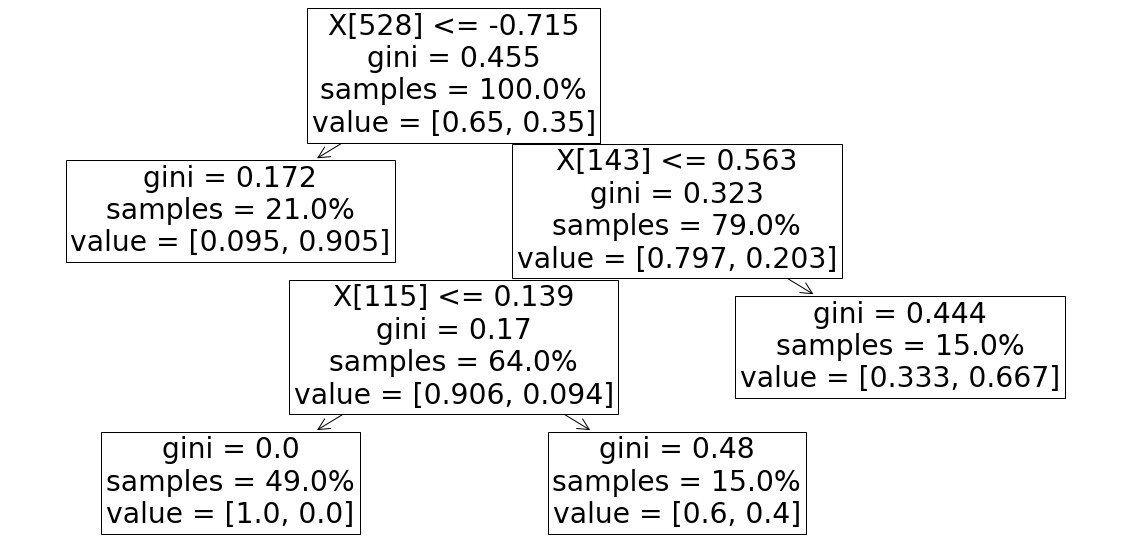

In [68]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, proportion=True) 

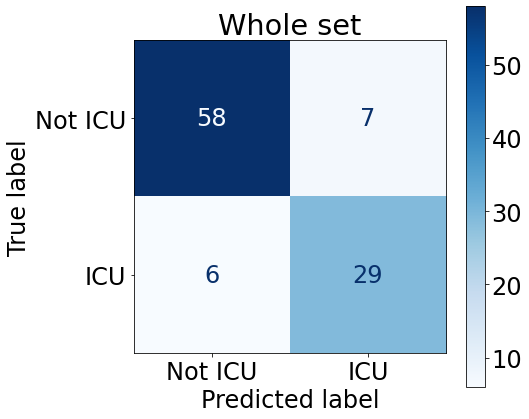

In [69]:
fig, ax = plt.subplots(figsize=(7,7))
plt.rcParams.update({'font.size': 24})

disp = plot_confusion_matrix(clf, features, Y,
                             display_labels=['Not ICU','ICU'],
                             cmap=plt.cm.Blues,
                             ax=ax)
disp.ax_.set_title('Whole set')

label_font = {'size':'24'}  # Adjust to fit
ax.set_xlabel('Predicted label', fontdict=label_font);
ax.set_ylabel('True label', fontdict=label_font);

### Cross-val

In [70]:
# cross-validation

from sklearn.model_selection import cross_val_score, cross_val_predict

cv_scores = cross_val_predict(clf, features, Y, cv=35)

print(confusion_matrix(Y, cv_scores))
print(classification_report(Y, cv_scores))

[[56  9]
 [18 17]]
              precision    recall  f1-score   support

         0.0       0.76      0.86      0.81        65
         1.0       0.65      0.49      0.56        35

    accuracy                           0.73       100
   macro avg       0.71      0.67      0.68       100
weighted avg       0.72      0.73      0.72       100



## Heatmap features

In [71]:
heatmaps_features_class1_path = "./output/went_icu_sel_proc2_heatmap_feat.csv"

heatmaps_features_class2_path = "./output/not_went_icu_sel_proc2_heatmap_feat.csv"

In [72]:
heatmaps_features_class1 = pd.read_csv(heatmaps_features_class1_path)
heatmaps_features_class1 = heatmaps_features_class1.iloc[:,1:].to_numpy()

print(heatmaps_features_class1.shape)

(35, 396)


In [73]:
heatmaps_features_class2 = pd.read_csv(heatmaps_features_class2_path)
heatmaps_features_class2 = heatmaps_features_class2.iloc[:,1:].to_numpy()

print(heatmaps_features_class2.shape)

(65, 396)


In [74]:
#concatenate
heatmaps_features = np.concatenate((heatmaps_features_class1, heatmaps_features_class2), axis=0)
print(heatmaps_features.shape)

#normalize
heatmaps_features_norm = (heatmaps_features - heatmaps_features.mean(axis=0)) / heatmaps_features.std(axis=0)  
print(heatmaps_features_norm.shape)

(100, 396)
(100, 396)


In [75]:
feature_name_heatmap_path = './output/features_names_heatmap.txt'

feature_names_heatmaps = []
with open(feature_name_heatmap_path,'r') as f:
    for line in f:
        feature_names_heatmaps.append(str(line))
        
print(len(feature_names_heatmaps))
print(feature_names_heatmaps[0:5])

396
['Atelectasis_whole_image_entropy\n', 'Atelectasis_whole_image_energy\n', 'Atelectasis_long1_entropy\n', 'Atelectasis_long1_energy\n', 'Atelectasis_long2_entropy\n']


In [76]:
features = heatmaps_features_norm
features_names_ = feature_names_heatmaps# feature_names_heatmaps

max_depth_tree = 3
min_samples_leaf = 20
clf = tree.DecisionTreeClassifier(class_weight={0:1,1:1},max_depth=max_depth_tree, min_samples_leaf=min_samples_leaf)

#class_weight={0:10,1:1}

in_training_loss = True
train_test_ratio = 0.2

if in_training_loss:
    clf = clf.fit(features, Y)
    y_pred = clf.predict(features)

    print(confusion_matrix(Y, y_pred))
    print(classification_report(Y, y_pred))

    feature_lst=[i for i in clf.tree_.feature if i != -2]

    print('features =', feature_lst)
    print('features name=', list(itemgetter(*feature_lst)(features_names_)))

else:
  X_train, X_test, y_train, y_test = \
  train_test_split(features, Y, test_size=train_test_ratio)

  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

[[53 12]
 [ 5 30]]
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86        65
         1.0       0.71      0.86      0.78        35

    accuracy                           0.83       100
   macro avg       0.81      0.84      0.82       100
weighted avg       0.84      0.83      0.83       100

features = [173, 226, 248]
features name= ['Fibrosis_quad5_energy\n', 'Infiltration_trans1_entropy\n', 'Lung Lesion_trans1_entropy\n']


[Text(446.4, 475.65000000000003, 'X[173] <= -0.367\ngini = 0.455\nsamples = 100.0%\nvalue = [0.65, 0.35]'),
 Text(223.2, 339.75, 'gini = 0.298\nsamples = 22.0%\nvalue = [0.182, 0.818]'),
 Text(669.5999999999999, 339.75, 'X[226] <= 0.278\ngini = 0.341\nsamples = 78.0%\nvalue = [0.782, 0.218]'),
 Text(446.4, 203.85000000000002, 'X[248] <= -0.134\ngini = 0.158\nsamples = 58.0%\nvalue = [0.914, 0.086]'),
 Text(223.2, 67.94999999999999, 'gini = 0.0\nsamples = 32.0%\nvalue = [1.0, 0.0]'),
 Text(669.5999999999999, 67.94999999999999, 'gini = 0.311\nsamples = 26.0%\nvalue = [0.808, 0.192]'),
 Text(892.8, 203.85000000000002, 'gini = 0.48\nsamples = 20.0%\nvalue = [0.4, 0.6]')]

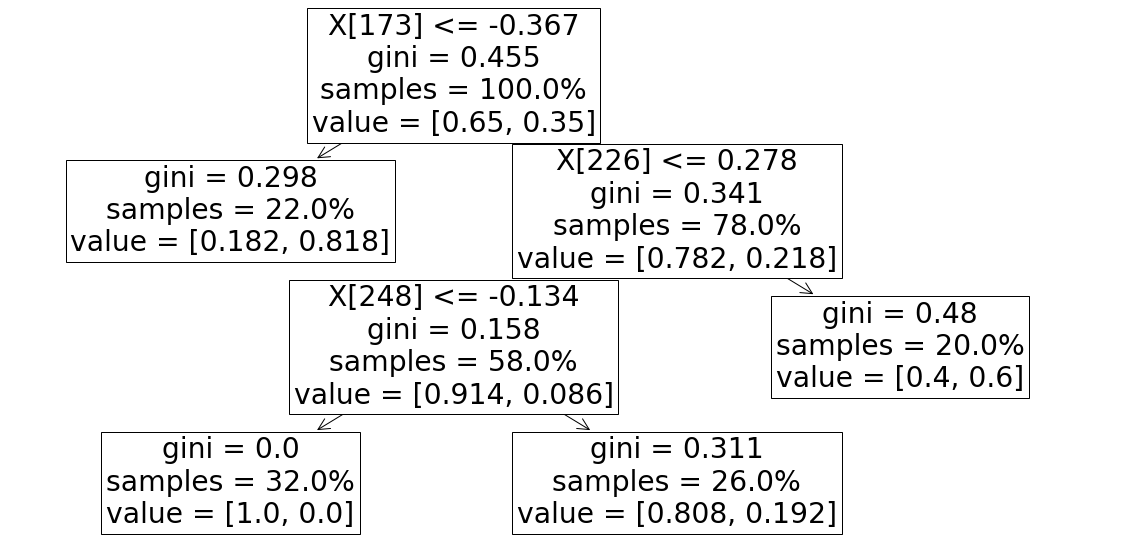

In [77]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, proportion=True) 

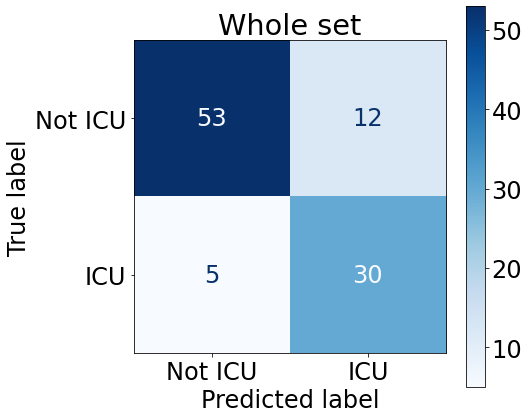

In [78]:
fig, ax = plt.subplots(figsize=(7,7))
plt.rcParams.update({'font.size': 24})

disp = plot_confusion_matrix(clf, features, Y,
                             display_labels=['Not ICU','ICU'],
                             cmap=plt.cm.Blues,
                             ax=ax)
disp.ax_.set_title('Whole set')

label_font = {'size':'24'}  # Adjust to fit
ax.set_xlabel('Predicted label', fontdict=label_font);
ax.set_ylabel('True label', fontdict=label_font);


### Cross-val

In [79]:
# cross-validation

from sklearn.model_selection import cross_val_score, cross_val_predict

cv_scores = cross_val_predict(clf, features, Y, cv=35)

print(confusion_matrix(Y, cv_scores))
print(classification_report(Y, cv_scores))

[[49 16]
 [12 23]]
              precision    recall  f1-score   support

         0.0       0.80      0.75      0.78        65
         1.0       0.59      0.66      0.62        35

    accuracy                           0.72       100
   macro avg       0.70      0.71      0.70       100
weighted avg       0.73      0.72      0.72       100



# BIMCV Pred

In [80]:
data_test_name = "./output/bimcv_full_18feat.csv"

data_test = pd.read_csv(data_test_name)
data_test = data_test.iloc[:,1:].to_numpy()

print(data_test.shape)

(1312, 18)


In [81]:
data_test_norm = (data_test - data_test.mean(axis=0)) / data_test.std(axis=0)  
data_test_norm[np.isnan(data_test_norm)] = 0

In [89]:
#predict on test data

#y_pred = clf.predict(data_test)
y_pred = clf.predict(data_test_norm)

print('no_preds =', len(y_pred))
print('label 0 =', len([a for a in y_pred if a==0]))
print('label 1 =', len([a for a in y_pred if a==1]))

no_preds = 1312
label 0 = 798
label 1 = 514


In [90]:
output_pred_pth = './output/bim_predictions.txt'
output_pred_file = open(output_pred_pth,'w')


for y in y_pred:
    output_pred_file.write(str(int(y)))
    output_pred_file.write(',')
output_pred_file.close()